In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Read the Dataset

In [5]:
df_raw = pd.read_csv("../data/web_trust.csv",index_col=0)
print("shape:",df_raw.shape)
df_raw.head()

shape: (5691, 49)


,document_id,URL,Credibility_rating,ad_count,ad_max_size,css_definitions,page_rank,bitly_clicks,bitly_referrers,tweets,delicious_bookmarks,fb_clicks,fb_comments,fb_likes,fb_shares,fb_total,alexa_linksin,alexa_rank,commas,dots,exclamations,questions,spelling_errors,text_complexity,smog,category,JJ,NN,DT,VB,RB,num_ne,sum_ne,document_url_y,X1,X2,X3,X4,X5,X9,Total,Leik,Eijk,Tastle,Leik 3 4 6,correction,resp_HNC,Controversial,troia_label
0,2199424,http://unemployment.ohio.gov/,3.714286,0.0,0.0,106.0,6.0,9.0,5.0,22.0,23.0,0.0,10.0,12.0,62.0,84.0,68.0,6137.0,101.0,114.0,1.0,0.0,98.0,6.543833,15.903189,computer_internet,121.0,938.0,184.0,338.0,52.0,7.0,29.0,gov,0.0,1.0,2.0,2.0,2.0,0.0,7.0,0.571429,0.357143,0.613196,0.542857,0.0,2,U,3.0
1,2199427,http://www.law.cornell.edu/wex/unemployment_co...,4.428571,4.0,75000.0,1824.0,5.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9098.0,2661.0,15.0,23.0,0.0,0.0,2.0,3.813895,15.903189,business,35.0,168.0,59.0,71.0,5.0,4.0,17.0,edu,0.0,0.0,1.0,2.0,4.0,0.0,7.0,0.714286,0.714286,0.735143,0.600000,0.0,3,U,5.0
2,2547110,http://kiem-tv.com/?q=node/4395,4.000000,0.0,0.0,18.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,2.0,185.0,809409.0,19.0,18.0,0.0,1.0,26.0,3.163160,11.208143,health,18.0,100.0,23.0,52.0,11.0,5.0,20.0,com,0.0,0.0,2.0,3.0,2.0,0.0,7.0,0.714286,0.571429,0.762836,0.657143,0.0,2,U,4.0
3,2547112,http://www.sciencedaily.com/releases/2012/09/1...,4.833333,9.0,75000.0,383.0,3.0,45.0,9.0,100.0,2.0,0.0,17.0,35.0,113.0,165.0,50939.0,2549.0,19.0,20.0,0.0,0.0,15.0,3.727098,14.554593,health,39.0,156.0,46.0,67.0,21.0,8.0,24.0,com,0.0,0.0,0.0,1.0,5.0,0.0,6.0,0.916667,0.916667,0.892660,0.866667,0.0,3,U,5.0
4,2547113,http://articles.timesofindia.indiatimes.com/20...,3.888889,2.0,75000.0,599.0,3.0,3.0,3.0,7.0,0.0,0.0,1.0,3.0,3.0,7.0,1250.0,132.0,19.0,17.0,0.0,0.0,16.0,3.357533,14.554593,science_technology,32.0,112.0,39.0,57.0,8.0,6.0,10.0,com,0.0,0.0,3.0,4.0,2.0,0.0,9.0,0.722222,0.611111,0.756750,0.688889,0.0,2,U,4.0


#### Inference: There are 5,691 rows and 49 columns in the raw data set

### Check the Column datatypes

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5691 entries, 0 to 5690
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   document_id          5691 non-null   int64  
 1   URL                  5691 non-null   object 
 2   Credibility_rating   5691 non-null   float64
 3   ad_count             5642 non-null   float64
 4   ad_max_size          5642 non-null   float64
 5   css_definitions      5662 non-null   float64
 6   page_rank            5687 non-null   float64
 7   bitly_clicks         5684 non-null   float64
 8   bitly_referrers      5684 non-null   float64
 9   tweets               5687 non-null   float64
 10  delicious_bookmarks  5662 non-null   float64
 11  fb_clicks            5680 non-null   float64
 12  fb_comments          5680 non-null   float64
 13  fb_likes             5680 non-null   float64
 14  fb_shares            5680 non-null   float64
 15  fb_total             5462 non-null   f

#### Inference: Looking at the information above we can see there are null values in some of the columns , also some of the columns we don't need for predicting the creditbility score.

### Delete the columns not needed for Analysis

In [7]:
'''
cols_not_required = ['document_id','URL',"num_ne","sum_ne","fb_total",'X1',"X2","X3","X4","X5","X9",
                     "Total","Leik","Eijk","Tastle","Leik 3 4 6","correction","resp_HNC","troia_label"]
'''

'\ncols_not_required = [\'document_id\',\'URL\',"num_ne","sum_ne","fb_total",\'X1\',"X2","X3","X4","X5","X9",\n                     "Total","Leik","Eijk","Tastle","Leik 3 4 6","correction","resp_HNC","troia_label"]\n'

In [8]:
cols_not_required = ['document_id','URL','X1',"X2","X3","X4","X5","X9","Total","Tastle","Leik 3 4 6","troia_label","num_ne","sum_ne","Eijk","Leik","exclamations","commas","dots","ad_count","ad_max_size","spelling_errors","questions","fb_total","css_definitions","category","delicious_bookmarks","smog","text_complexity","alexa_rank","NN","VB","fb_comments","fb_shares","RB","fb_clicks"]

In [9]:
# make a copy of the raw data
df_main = df_raw.copy()

In [10]:
df_main.drop(cols_not_required,axis=1,inplace=True)
df_main.head()

,Credibility_rating,page_rank,bitly_clicks,bitly_referrers,tweets,fb_likes,alexa_linksin,JJ,DT,document_url_y,correction,resp_HNC,Controversial
0,3.714286,6.0,9.0,5.0,22.0,12.0,68.0,121.0,184.0,gov,0.0,2,U
1,4.428571,5.0,12.0,1.0,1.0,0.0,9098.0,35.0,59.0,edu,0.0,3,U
2,4.000000,2.0,0.0,0.0,5.0,0.0,185.0,18.0,23.0,com,0.0,2,U
3,4.833333,3.0,45.0,9.0,100.0,35.0,50939.0,39.0,46.0,com,0.0,3,U
4,3.888889,3.0,3.0,3.0,7.0,3.0,1250.0,32.0,39.0,com,0.0,2,U


In [11]:
df_main.columns


Index(['Credibility_rating', 'page_rank', 'bitly_clicks', 'bitly_referrers',
       'tweets', 'fb_likes', 'alexa_linksin', 'JJ', 'DT', 'document_url_y',
       'correction', 'resp_HNC', 'Controversial'],
      dtype='object')

### Handling the missing values

In [12]:
cat_cols = df_main.select_dtypes(include=object).columns.tolist()

In [13]:
cat_cols

['document_url_y', 'resp_HNC', 'Controversial']

In [14]:
df_plot = df_main.drop(cat_cols, axis=1)

In [15]:
df_plot.shape

(5691, 10)

In [16]:
df_plot1 = df_plot.iloc[:,:20]
df_plot1.shape

(5691, 10)

In [17]:
df_plot.corr().T

,Credibility_rating,page_rank,bitly_clicks,bitly_referrers,tweets,fb_likes,alexa_linksin,JJ,DT,correction
Credibility_rating,1.000000,0.285063,0.002278,0.041272,0.000670,0.015117,0.043432,0.027302,0.028728,0.210198
page_rank,0.285063,1.000000,0.016510,0.088968,0.014889,0.052489,0.136177,0.052889,0.042866,0.064699
bitly_clicks,0.002278,0.016510,1.000000,0.376216,0.991622,0.697212,0.001253,-0.005110,-0.004415,-0.027822
bitly_referrers,0.041272,0.088968,0.376216,1.000000,0.308982,0.483378,0.056542,0.017055,0.010634,0.000552
tweets,0.000670,0.014889,0.991622,0.308982,1.000000,0.697113,-0.000515,-0.004044,-0.003364,-0.029942
fb_likes,0.015117,0.052489,0.697212,0.483378,0.697113,1.000000,0.016423,0.011601,0.011436,-0.014564
alexa_linksin,0.043432,0.136177,0.001253,0.056542,-0.000515,0.016423,1.000000,0.125853,0.114736,0.006396
JJ,0.027302,0.052889,-0.005110,0.017055,-0.004044,0.011601,0.125853,1.000000,0.973148,0.001078
DT,0.028728,0.042866,-0.004415,0.010634,-0.003364,0.011436,0.114736,0.973148,1.000000,0.001217
correction,0.210198,0.064699,-0.027822,0.000552,-0.029942,-0.014564,0.006396,0.001078,0.001217,1.000000


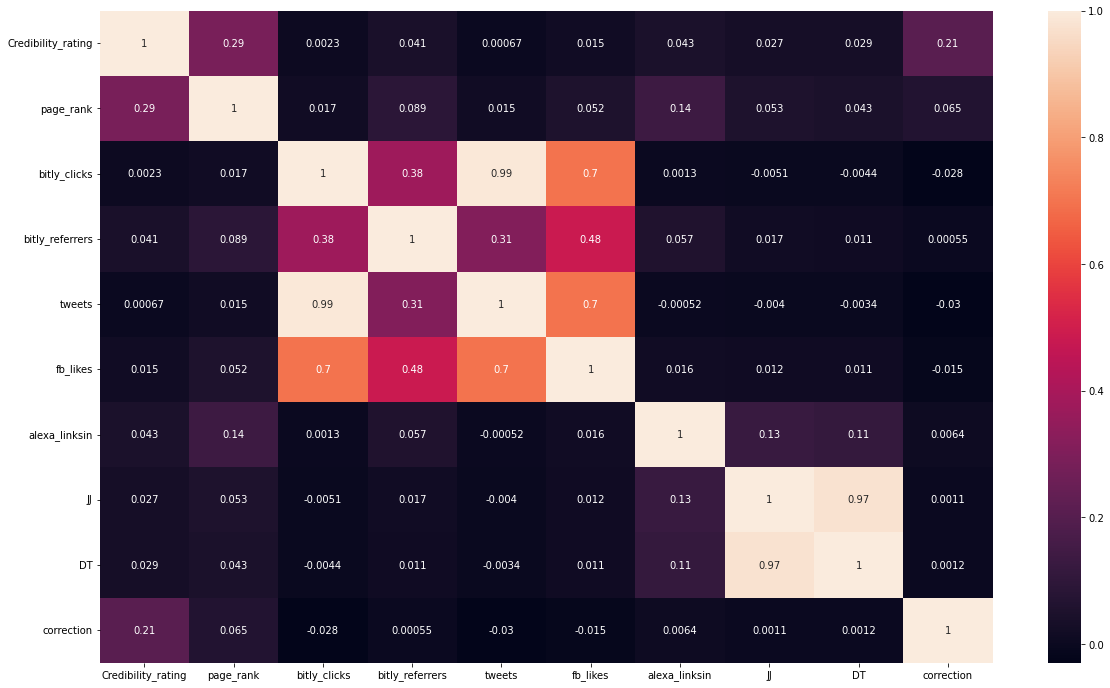

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(df_plot1.corr(),annot=True)
plt.show()

In [19]:
df_main.describe()

,Credibility_rating,page_rank,bitly_clicks,bitly_referrers,tweets,fb_likes,alexa_linksin,JJ,DT,correction
count,5691.000000,5687.000000,5684.000000,5684.000000,5687.000000,5680.000000,5.680000e+03,5419.000000,5407.000000,5691.000000
mean,4.054622,2.390716,273.654469,3.216749,130.251627,115.997535,2.798695e+04,58.256136,69.696689,-0.160956
std,0.829059,2.067615,12153.556309,22.823327,7759.804697,2145.456839,1.864240e+05,159.914509,233.523205,0.367523
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,-1.000000
25%,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000e+01,14.000000,16.000000,0.000000
50%,4.200000,2.000000,0.000000,0.000000,0.000000,0.000000,2.620000e+02,30.000000,34.000000,0.000000
75%,4.585714,4.000000,1.000000,1.000000,2.000000,2.000000,1.944000e+03,61.000000,70.000000,0.000000
max,5.000000,9.000000,908270.000000,500.000000,584357.000000,109127.000000,2.201237e+06,7948.000000,12268.000000,0.000000


In [20]:
df_main.describe(include='O')

,document_url_y,resp_HNC,Controversial
count,5691,5691,5691
unique,32,5,2
top,com,3,U
freq,3778,2676,5556


In [21]:
#df_main['category'].value_counts()

In [22]:
df_main['document_url_y'].nunique()

32

In [23]:
array = ['com', 'org', 'gov', 'edu','net','uk','au','ca','in']
df2 = df_main.loc[df_main['document_url_y'].isin(array)]
df2.shape

(5565, 13)

In [24]:
df2.describe(include='O')

,document_url_y,resp_HNC,Controversial
count,5565,5565,5565
unique,9,5,2
top,com,3,U
freq,3778,2628,5434


In [25]:
### Handling NULLs

In [26]:
df2.isna().sum()/df2.shape[0]*100

Credibility_rating    0.000000
page_rank             0.071878
bitly_clicks          0.125786
bitly_referrers       0.125786
tweets                0.071878
fb_likes              0.179695
alexa_linksin         0.197664
JJ                    4.851752
DT                    5.031447
document_url_y        0.000000
correction            0.000000
resp_HNC              0.000000
Controversial         0.000000
dtype: float64

In [27]:
## Dropping the missing values.
df2.dropna(inplace=True)

In [28]:
df2.isna().sum()/df2.shape[0]*100

Credibility_rating    0.0
page_rank             0.0
bitly_clicks          0.0
bitly_referrers       0.0
tweets                0.0
fb_likes              0.0
alexa_linksin         0.0
JJ                    0.0
DT                    0.0
document_url_y        0.0
correction            0.0
resp_HNC              0.0
Controversial         0.0
dtype: float64

### One Hot Encoding

In [29]:
## dummy encode the categorical variable.
df1 = pd.get_dummies(df2,drop_first=True)
df1.shape

(5258, 23)

### Splitting the dataset

In [30]:
y = df1["Credibility_rating"]
X = df1.drop("Credibility_rating",axis=1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Scaling the dataset

In [31]:
X_train.head()

,page_rank,bitly_clicks,bitly_referrers,tweets,fb_likes,alexa_linksin,JJ,DT,correction,document_url_y_ca,document_url_y_com,document_url_y_edu,document_url_y_gov,document_url_y_in,document_url_y_net,document_url_y_org,document_url_y_uk,resp_HNC_1,resp_HNC_2,resp_HNC_3,resp_HNC_C,Controversial_U
3993,0.0,0.0,0.0,0.0,0.0,297.0,32.0,28.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1
2986,0.0,5.0,3.0,42.0,13.0,9237.0,116.0,192.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,1
1521,3.0,0.0,0.0,0.0,0.0,247.0,47.0,92.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1
432,4.0,0.0,0.0,0.0,0.0,7284.0,47.0,52.0,0.0,0,0,0,0,0,0,1,0,0,0,1,0,1
5386,1.0,0.0,0.0,1.0,0.0,20.0,13.0,28.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [32]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### PCA

In [33]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Covariance Matrix 
%s [[ 1.00027181e+00  1.75067461e-02  8.52567033e-02  1.61013140e-02
   3.68364093e-02  1.46647595e-01  5.47064268e-02  4.96702852e-02
   7.70152352e-02 -1.79769519e-02 -1.90274333e-01  8.69721458e-02
   1.64968071e-01  3.08832900e-02 -6.02962162e-02  1.21720215e-01
   6.69143429e-02 -1.43887288e-01 -1.29357391e-01  2.41941655e-01
  -8.59166848e-02  7.65068095e-02]
 [ 1.75067461e-02  1.00027181e+00  4.04671667e-01  9.95463902e-01
   8.29033523e-01 -5.29629098e-04 -8.14450462e-03 -6.92928277e-03
  -3.62160693e-02 -2.72903273e-03 -2.06489107e-02 -4.60973538e-03
  -3.87902285e-03 -2.60391389e-03 -4.09889668e-03 -1.01019838e-02
   9.29247441e-02 -3.47612822e-03 -1.43712816e-02 -1.22507830e-02
   4.19602583e-02  9.18561755e-04]
 [ 8.52567033e-02  4.04671667e-01  1.00027181e+00  3.51227783e-01
   3.65327312e-01  5.26776651e-02  1.30789800e-02  7.65527345e-03
  -8.25219596e-03 -1.26222916e-02  3.73714671e-02 -2.55930138e-02
  -8.86108934e-03 -1.56703308e-02 -1.98605869e-02 

In [34]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 13.66626327  24.17153533  33.63204448  42.05523169  49.28610324
  55.2859936   60.44803084  65.27002574  69.95383319  74.58394258
  79.17004795  83.73345745  87.90841504  91.4616133   94.86802292
  98.05462619  99.06325986  99.6739102   99.88461096  99.98406396
  99.99806138 100.        ]


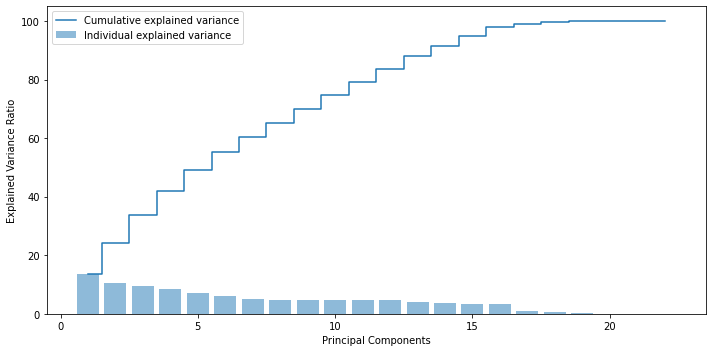

In [35]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [36]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = len(X.columns))
 
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

### Random Forest model

In [37]:
rf =RandomForestRegressor()
rf_model = rf.fit(X_train,y_train)

In [38]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
print('\n')
print('train r2_score:',r2_score(y_train,y_train_pred),',','test r2_score:',r2_score(y_test,y_test_pred))
print('\n')
print('train MSE:',mean_squared_error(y_train,y_train_pred),',','test MSE:',mean_squared_error(y_test,y_test_pred))



train r2_score: 0.9693378846568526 , test r2_score: 0.786533824971501


train MSE: 0.020718591252315052 , test MSE: 0.1489865134557222


Text(0.5, 1.0, 'Feature Importance')

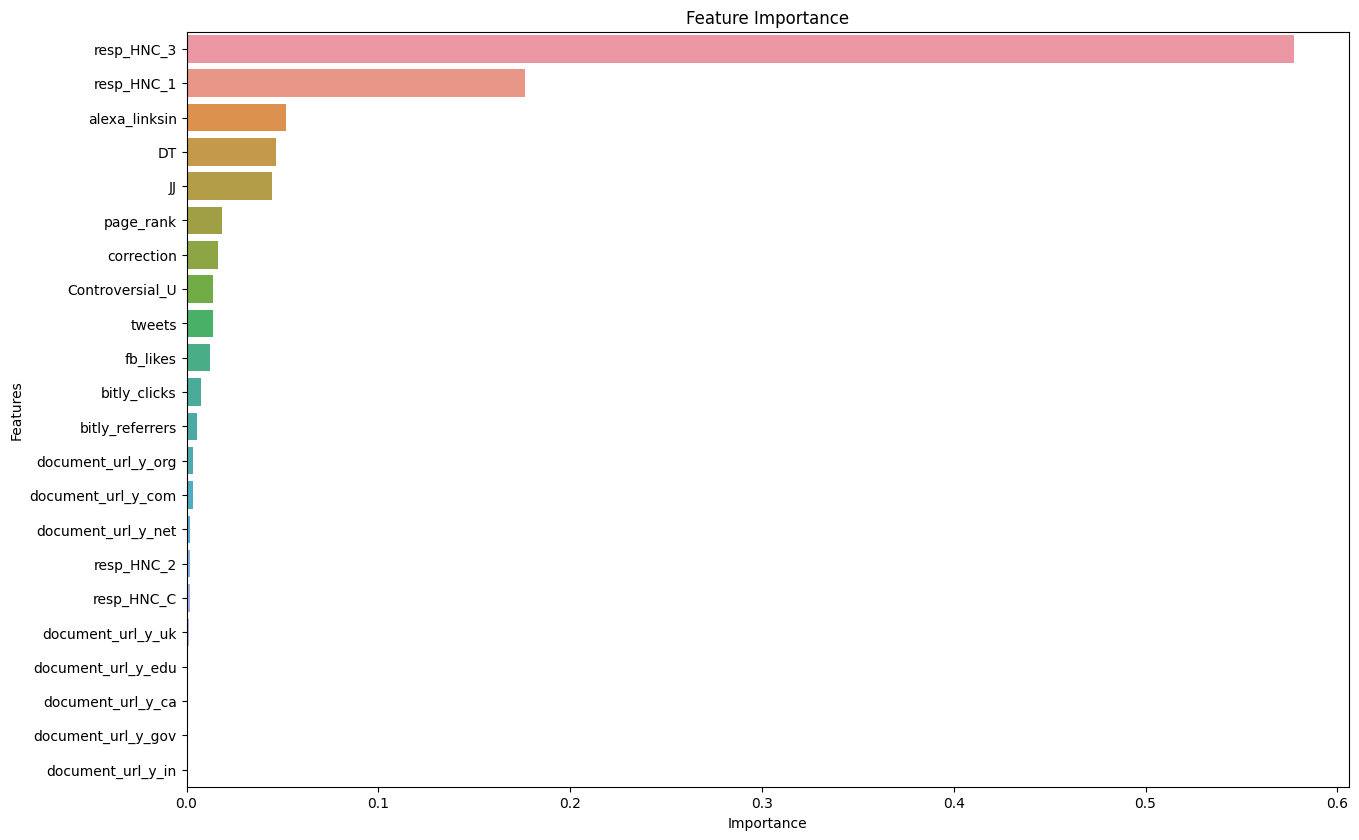

In [39]:
FI_df=pd.DataFrame({'Features': X.columns, 'Importance': rf.feature_importances_})
FI_df=FI_df.sort_values(by='Importance', ascending=False).head(100)

#plot feature importance
plt.figure(figsize=(15,10),dpi=100)
sns.barplot(x=FI_df[:30].Importance,y=FI_df[:30].Features,orient = 'h').set_title('Feature Importance')

In [40]:
rf =RandomForestRegressor()
rf_model = rf.fit(X_train_pc,y_train)

rf_predict_train = rf_model.predict(X_train_pc)
rf_predict_test = rf_model.predict(X_test_pc)
print('\n')
print('train r2_score:',r2_score(y_train,rf_predict_train),',','test r2_score:',r2_score(y_test,rf_predict_test))
print('\n')
print('train MSE:',mean_squared_error(y_train,rf_predict_train),',','test MSE:',mean_squared_error(y_test,rf_predict_test))



train r2_score: 0.9664357503113609 , test r2_score: 0.7745703541605299


train MSE: 0.022679582351286497 , test MSE: 0.15733629442087008


In [41]:
rf.feature_importances_

array([0.01653492, 0.03483991, 0.0101583 , 0.0084787 , 0.01026498,
       0.19869781, 0.00789371, 0.00741918, 0.01340426, 0.00697396,
       0.00701593, 0.00745039, 0.00812253, 0.0204707 , 0.01126103,
       0.00896021, 0.01104294, 0.55306247, 0.0155255 , 0.01256959,
       0.01639601, 0.01345697])

Text(0.5, 1.0, 'Feature Importance')

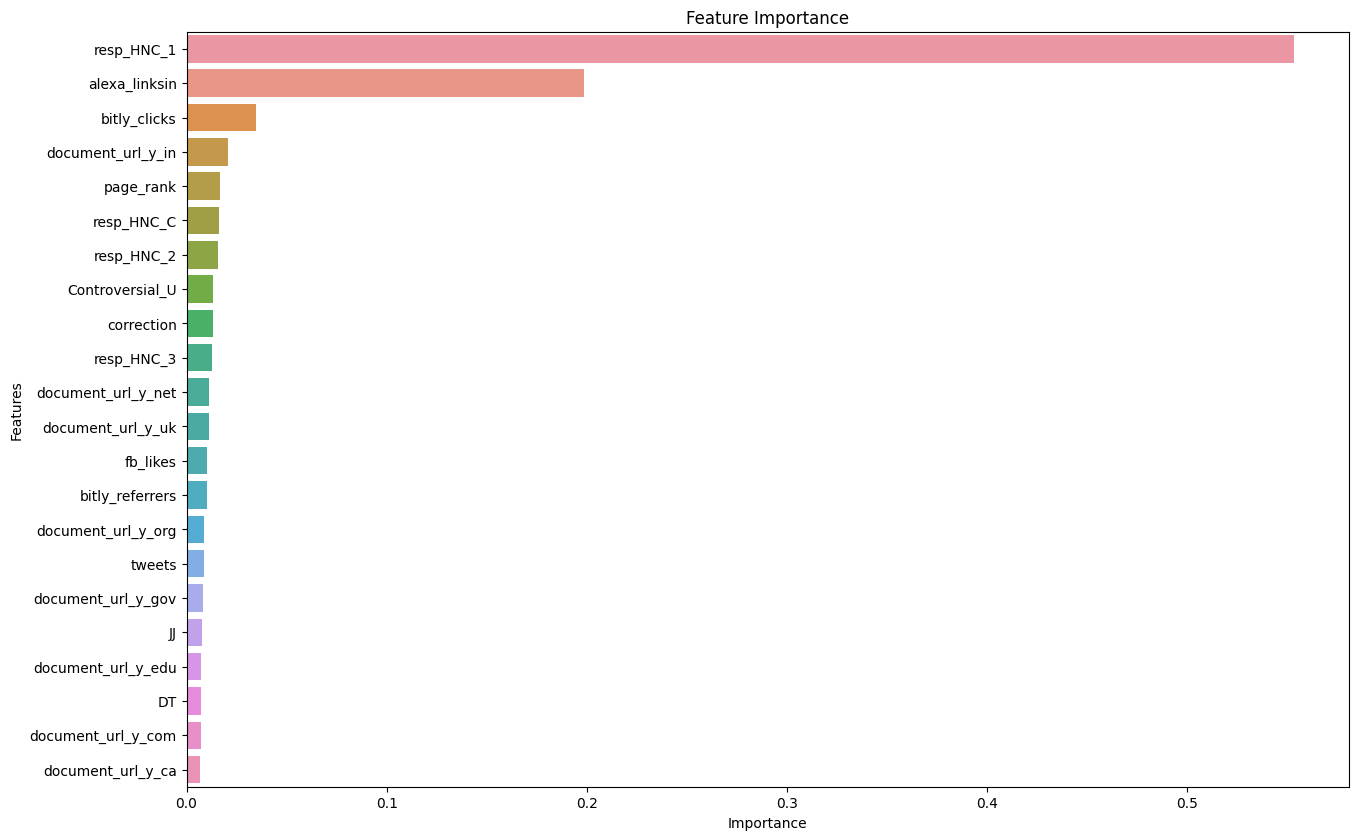

In [42]:
FI_df=pd.DataFrame({'Features': X.columns, 'Importance': rf.feature_importances_})
FI_df=FI_df.sort_values(by='Importance', ascending=False).head(100)

#plot feature importance
plt.figure(figsize=(15,10),dpi=100)
sns.barplot(x=FI_df[:30].Importance,y=FI_df[:30].Features,orient = 'h').set_title('Feature Importance')

In [43]:
FI_df.head(5)

,Features,Importance
17,resp_HNC_1,0.553062
5,alexa_linksin,0.198698
1,bitly_clicks,0.034840
13,document_url_y_in,0.020471
0,page_rank,0.016535


In [46]:
import pickle

In [44]:
with open("rf_credibility_model",'wb') as file:
    pickle.dumps(rf,file)
file.close()

NameError: name 'pickle' is not defined